In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist 

In [2]:
tf.__version__

'2.3.0'

## Dataset -- MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)


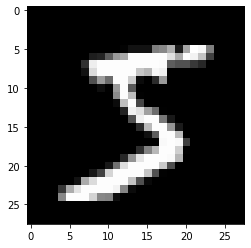

In [5]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [6]:
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (60000,)
y_test shape:  (10000,)


In [7]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


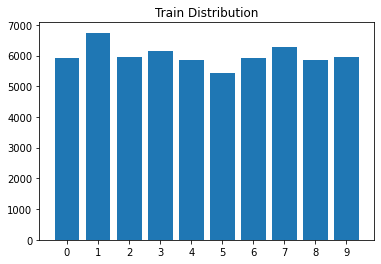

In [8]:
label, counts = np.unique(y_train, return_counts=True)
print(label)
print(counts)

plt.bar(label, counts, tick_label=label)
plt.title("Train Distribution")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                               test_size=0.2,
                               random_state=2,
                               stratify=y_train)

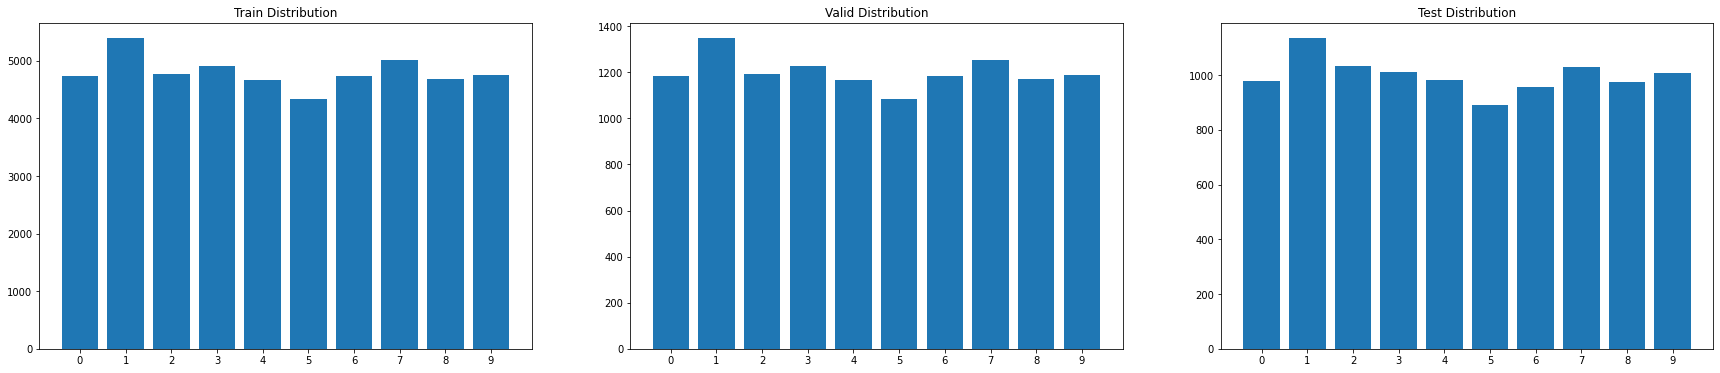

In [11]:
data_list = [y_train, y_valid, y_test]
data_types = ["Train", "Valid", "Test"]

plt.figure(figsize=(30, 6))
for i in range(3):
  label, counts = np.unique(data_list[i], return_counts=True)

  plt.subplot(1, 3, i+1)
  plt.bar(label, counts, tick_label=label)
  plt.title(data_types[i]+" Distribution")
plt.show()

## Data Preprocessing

In [12]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  uint8
x_train max:  255
x_train min:  0


#### min_max normalization

In [13]:
x_train = x_train.astype("float32")/255
x_valid = x_valid.astype("float32")/255
x_test = x_test.astype("float32")/255

In [14]:
print("x_train type: ", x_train.dtype)
print("x_train max: ", x_train.max())
print("x_train min: ", x_train.min())

x_train type:  float32
x_train max:  1.0
x_train min:  0.0


#### Reshape

In [15]:
print("x_train shape: ", x_train.shape)

x_train shape:  (48000, 28, 28)


In [16]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [17]:
print("x_train shape: ", x_train.shape)

x_train shape:  (48000, 784)


#### Category -- One-Hot Encoding

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_one = to_categorical(y_train)
y_valid_one = to_categorical(y_valid)
y_test_one = to_categorical(y_test)

In [20]:
print("y_train type: ", y_train.dtype)
print("y_train shape: ", y_train.shape)
print("preprocessing".center(30, "-"))
print("y_train_one type: ", y_train_one.dtype)
print("y_train_one shape: ", y_train_one.shape)

y_train type:  uint8
y_train shape:  (48000,)
--------preprocessing---------
y_train_one type:  float32
y_train_one shape:  (48000, 10)


## Modeling

In [21]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [22]:
num_classes = y_train_one[0].shape[0]
num_classes

10

In [23]:
inputs = layers.Input(shape=x_train[0].shape)
x = layers.Dense(320, activation="relu")(inputs)

x = layers.Dense(80)(x)
x = layers.Activation("relu")(x)
x = layers.Dense(20, activation="relu")(x)

outputs = layers.Dense(num_classes, activation="softmax")(x)


model = Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 320)               251200    
_________________________________________________________________
dense_1 (Dense)              (None, 80)                25680     
_________________________________________________________________
activation (Activation)      (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 278,710
Trainable params: 278,710
Non-trainable params: 0
________________________________________________

In [25]:
# model_weight = model.variables
# model_weight = model.get_weights()

In [26]:
# model_weight[0].shape

In [41]:
from tensorflow.keras import callbacks

In [ ]:
model_dir = "./model-logs"
if not os.path.exists(model_dir):
  os.makedirs(model_dir)

model


In [27]:
lr = 0.001
optimizer = optimizers.Adam(lr, 0.01)
model.compile(loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])

In [28]:
num_epoch = 10
batch_size = 64
history = model.fit(x_train, y_train_one,
            batch_size=batch_size,
            epochs=num_epoch,
            validation_data=(x_valid, y_valid_one))

Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2988 - accuracy: 0.9121 - val_loss: 0.1430 - val_accuracy: 0.9578
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1061 - accuracy: 0.9673 - val_loss: 0.1005 - val_accuracy: 0.9703
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0887 - val_accuracy: 0.9728
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.1087 - val_accuracy: 0.9689
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1186 - val_accuracy: 0.9685
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.0976 - val_accuracy: 0.9723
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.1129 - val_accuracy: 0.9735
Epoch 

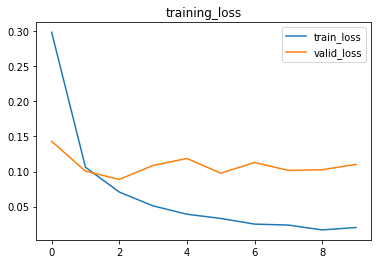

In [29]:
plt.plot(np.arange(num_epoch), history.history['loss'], label="train_loss")
plt.plot(np.arange(num_epoch), history.history['val_loss'], label="valid_loss")
plt.legend(loc='best')
plt.title('training_loss')
plt.show()

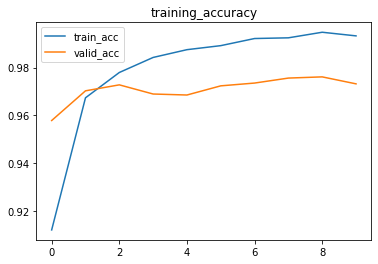

In [30]:
plt.plot(np.arange(num_epoch), history.history['accuracy'], label="train_acc")
plt.plot(np.arange(num_epoch), history.history['val_accuracy'], label="valid_acc")
plt.legend(loc='best')
plt.title('training_accuracy')
plt.show()

## Prediction

In [31]:
y_test_predprob = model.predict(x_test)
print(y_test_predprob[:3])

[[1.8548106e-11 3.3027206e-10 6.5050159e-08 3.4166536e-09 7.2493349e-14
  1.5740891e-10 9.6050358e-14 9.9999988e-01 6.0495851e-11 4.5451731e-09]
 [2.0047553e-15 2.3666624e-07 9.9999976e-01 3.5574543e-10 9.1931877e-13
  4.7624031e-08 1.2722658e-10 3.5064236e-11 1.1611797e-08 2.9867875e-18]
 [4.8612947e-13 9.9990201e-01 5.8079036e-07 4.6006075e-09 5.3477497e-06
  7.6752040e-05 5.9840137e-09 1.3084300e-05 2.1309095e-06 2.1824027e-09]]


In [32]:
y_test_predprob.shape

(10000, 10)

In [33]:
y_test_pred = y_test_predprob.argmax(-1)
print("y_test_pred shape: ", y_test_pred.shape)
print(y_test_pred[:3])

y_test_pred shape:  (10000,)
[7 2 1]


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
print(f"accuracy_score: {accuracy_score(y_test, y_test_pred):.3f}")
print("confusion matrix: \n", confusion_matrix(y_test, y_test_pred))

accuracy_score: 0.977
confusion matrix: 
 [[ 973    1    0    0    1    1    1    1    2    0]
 [   0 1127    4    0    0    1    1    1    1    0]
 [   4    1 1014    3    3    0    0    3    4    0]
 [   1    1    7  981    0    9    0    8    2    1]
 [   1    0    3    0  969    0    4    2    0    3]
 [   2    0    0    6    1  874    4    1    2    2]
 [   6    3    3    1    4    6  934    0    1    0]
 [   2    3    9    0    0    0    0 1006    2    6]
 [   2    0    3    9    2    3    3    2  947    3]
 [   3    7    0    8   17   10    1   15    3  945]]


In [36]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


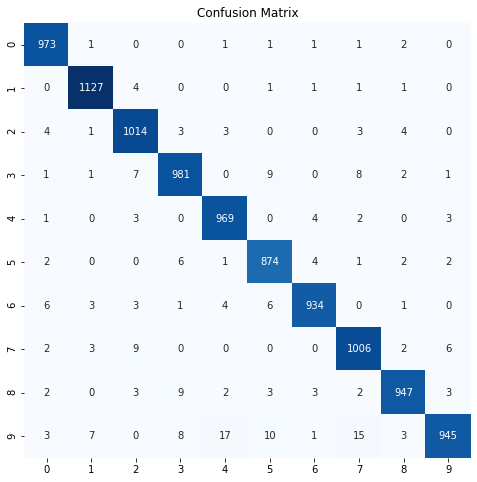

In [37]:
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
      cmap="Blues", annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.show()